In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
import scipy.linalg as la
import sklearn.datasets as ds

### Pré-processamento de dados

In [76]:
import sklearn.preprocessing as pp

D = ds.load_iris()

X = D.data
y = D.target
X.shape

(150, 4)

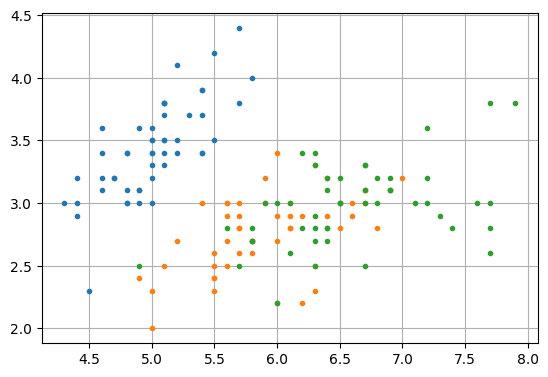

In [77]:
plt.plot(X[y==0,0],X[y==0,1],'.')
plt.plot(X[y==1,0],X[y==1,1],'.')
plt.plot(X[y==2,0],X[y==2,1],'.')
plt.axis('scaled')
plt.grid(True)

In [78]:
print(np.mean(X,axis=0))
print(np.std(X,axis=0))


[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


In [79]:
sc = pp.StandardScaler().fit(X)
Xn = sc.transform(X)

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]


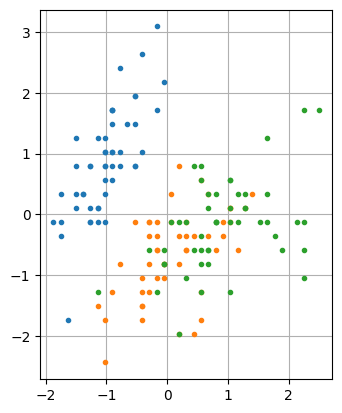

In [80]:
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
plt.axis('scaled')
plt.grid(True)
print(np.mean(Xn,axis=0))
print(np.std(Xn,axis=0))

In [81]:
rs = pp.RobustScaler().fit(X)
Xn = rs.transform(X)


[ 0.03333333  0.11466667 -0.16914286 -0.06711111]
[0.63484715 0.86882194 0.50268688 0.50646175]


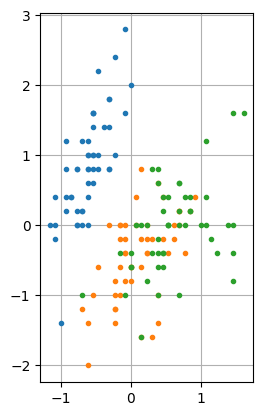

In [82]:
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
plt.axis('scaled')
plt.grid(True)
print(np.mean(Xn,axis=0))
print(np.std(Xn,axis=0))

In [83]:
mm = pp.MinMaxScaler().fit(X)
Xn = mm.transform(X)

[0.4287037  0.44055556 0.46745763 0.45805556]
[0.22925036 0.18100457 0.29820408 0.31653859]


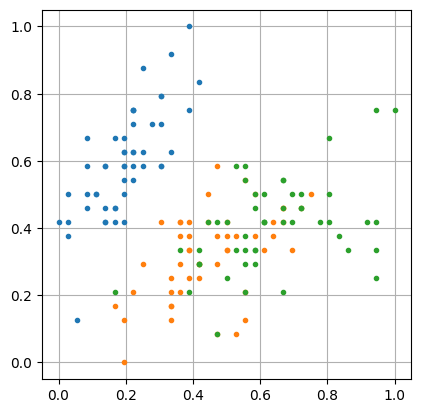

In [84]:
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
plt.axis('scaled')
plt.grid(True)
print(np.mean(Xn,axis=0))
print(np.std(Xn,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
(150,)


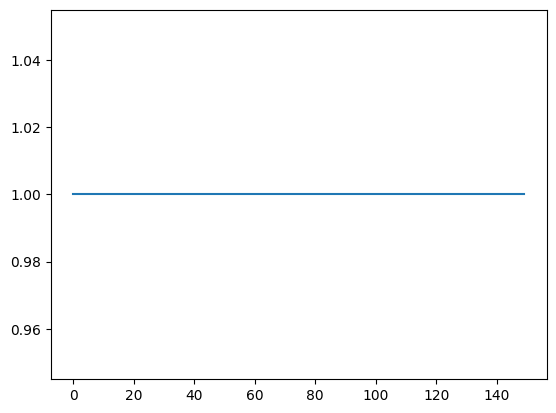

In [85]:
nn = pp.Normalizer().fit(X)
Xn = nn.transform(X)
nX = np.sqrt(np.sum(Xn**2,axis=1))
print(nX)
print(nX.shape)
plt.plot(nX)

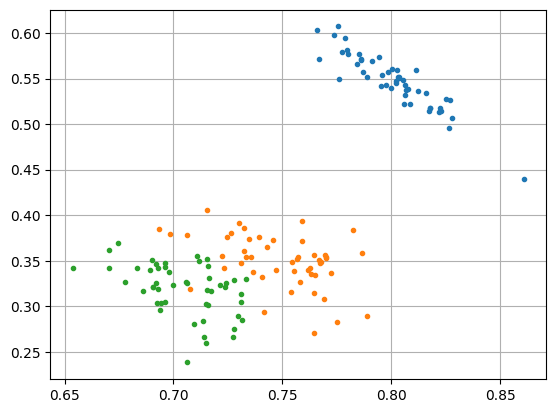

In [86]:
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
# plt.axis('scaled')
plt.grid(True)

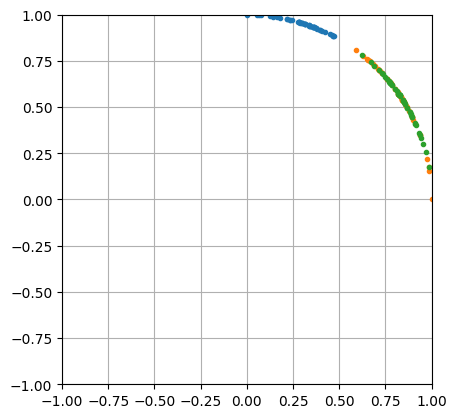

In [87]:
X2 = X[:,:2]
sc = pp.MinMaxScaler().fit(X2)
X2 = sc.transform(X2)
nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
plt.axis('scaled')
plt.axis([-1,1,-1,1])
plt.grid(True)

In [88]:
from mpl_toolkits.mplot3d import Axes3D

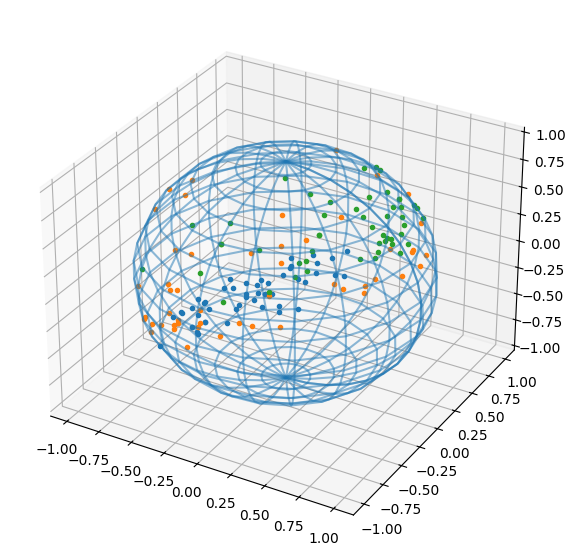

In [89]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
gx = np.cos(u)*np.sin(v)
gy = np.sin(u)*np.sin(v)
gz = np.cos(v)
f1 = plt.figure(figsize=(7,7))
ax = f1.add_subplot(111,projection='3d') #3D
ax.plot_wireframe(gx,gy,gz,alpha=0.5,)

X2 = X[:,:3]
sc = pp.StandardScaler().fit(X2)
X2 = sc.transform(X2)
nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)
ax.plot(Xn[y==0,0],Xn[y==0,1],Xn[y==0,2],'.')
ax.plot(Xn[y==1,0],Xn[y==1,1],Xn[y==1,2],'.')
ax.plot(Xn[y==2,0],Xn[y==2,1],Xn[y==2,2],'.')

In [90]:
fName = 'MNISTsmall.p'
D = pickle.load(open(fName,'rb'))
X = D['X']
y = D['trueClass']

In [91]:
X4 = X[:,y==4]

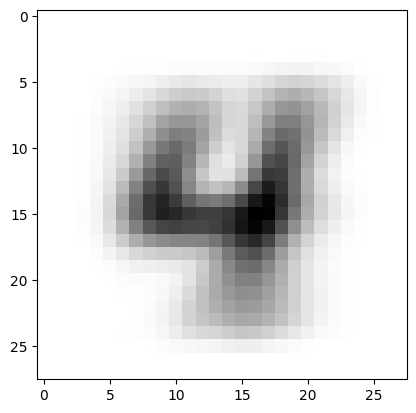

In [92]:
a = np.reshape(np.mean(X4,axis=1),(28,28))
plt.imshow(a,cmap='binary',interpolation=None)

In [93]:
X = X*1.
X.dtype

dtype('float64')

### Matrizes de correlação

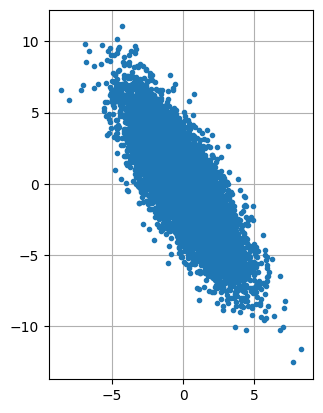

In [94]:
x = np.random.randn(2,10000)
A = np.random.randn(2,2)*2
X2 = np.dot(A,x)
plt.plot(X2[0,:],X2[1,:],'.')
plt.axis('scaled')
plt.grid(True)

[[ 3.70965216 -4.54379043]
 [-4.54379043  8.85833589]]


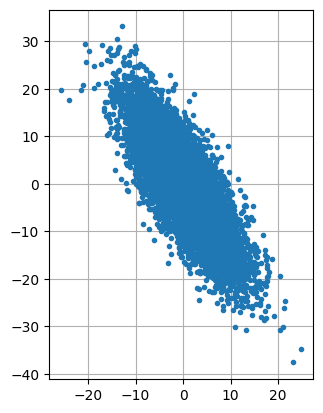

In [95]:
print(np.cov(X2))
X3 = 3*X2
plt.plot(X3[0,:],X3[1,:],'.')
plt.axis('scaled')
plt.grid(True)

In [96]:
print(np.cov(X2))
print()
print(np.cov(X3))
print()
print(np.corrcoef(X2))
print()
print(np.corrcoef(X3))

[[ 3.70965216 -4.54379043]
 [-4.54379043  8.85833589]]

[[ 33.38686948 -40.89411386]
 [-40.89411386  79.72502297]]

[[ 1.         -0.79263934]
 [-0.79263934  1.        ]]

[[ 1.         -0.79263934]
 [-0.79263934  1.        ]]


In [97]:
C0 = np.cov(X[:,y==0])
C1 = np.cov(X[:,y==1])
C2 = np.cov(X[:,y==2])
C3 = np.cov(X[:,y==3])
C4 = np.cov(X[:,y==4])
C5 = np.cov(X[:,y==5])
C6 = np.cov(X[:,y==6])
C7 = np.cov(X[:,y==7])
C8 = np.cov(X[:,y==8])
C9 = np.cov(X[:,y==9])


In [98]:
S0 = np.corrcoef(X[:,y==0])
S1 = np.corrcoef(X[:,y==1])
S2 = np.corrcoef(X[:,y==2])
S3 = np.corrcoef(X[:,y==3])
S4 = np.corrcoef(X[:,y==4])
S5 = np.corrcoef(X[:,y==5])
S6 = np.corrcoef(X[:,y==6])
S7 = np.corrcoef(X[:,y==7])
S8 = np.corrcoef(X[:,y==8])
S9 = np.corrcoef(X[:,y==9])

C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(np.float64(-0.5), np.float64(783.5), np.float64(783.5), np.float64(-0.5))

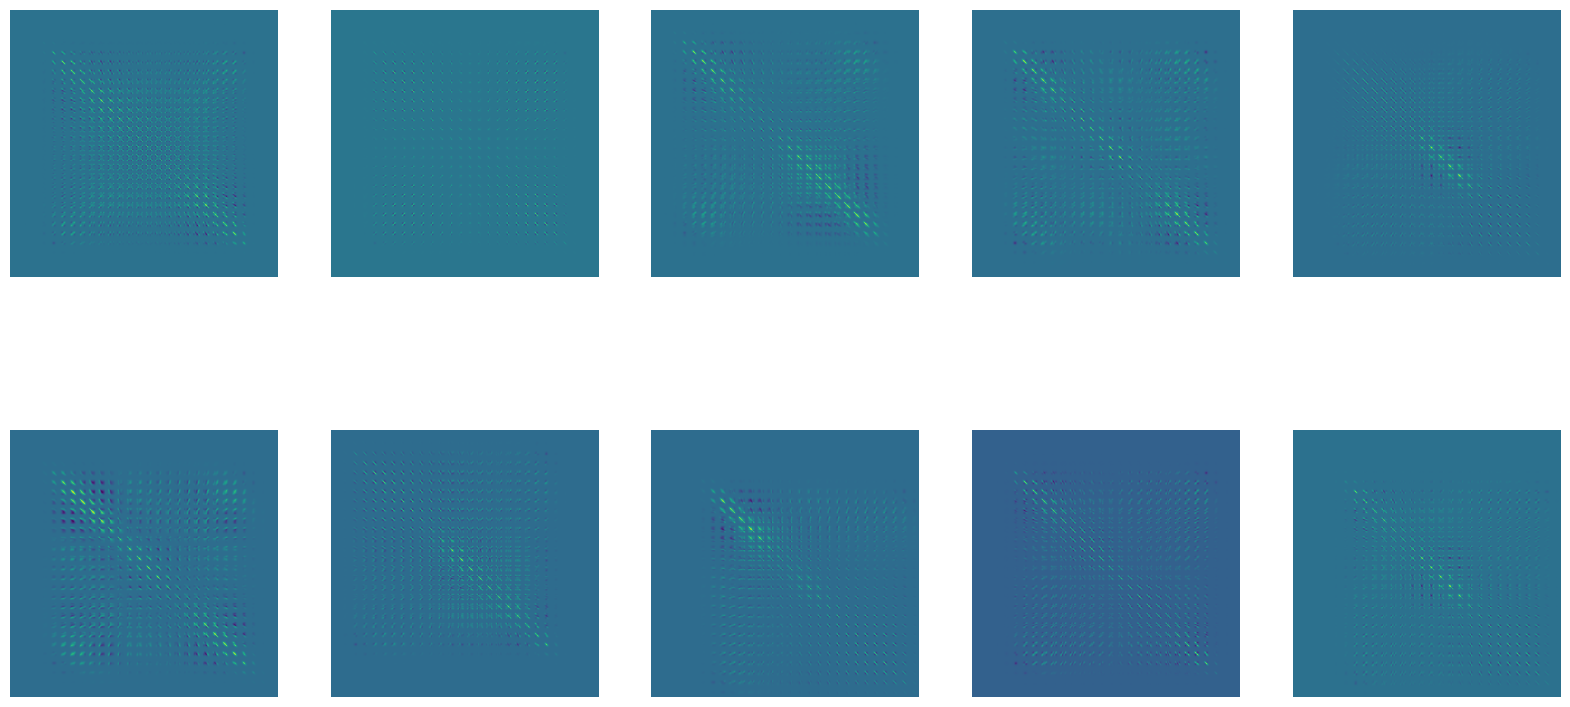

In [99]:
plt.figure(figsize=(20,10))
plt.subplot(251)
plt.imshow(C0)
plt.axis('off')
plt.subplot(252)
plt.imshow(C1)
plt.axis('off')
plt.subplot(253)
plt.imshow(C2)
plt.axis('off')
plt.subplot(254)
plt.imshow(C3)
plt.axis('off')
plt.subplot(255)
plt.imshow(C4)
plt.axis('off')
plt.subplot(256)
plt.imshow(C5)
plt.axis('off')
plt.subplot(257)
plt.imshow(C6)
plt.axis('off')
plt.subplot(258)
plt.imshow(C7)
plt.axis('off')
plt.subplot(259)
plt.imshow(C8)
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(C9)
plt.axis('off')

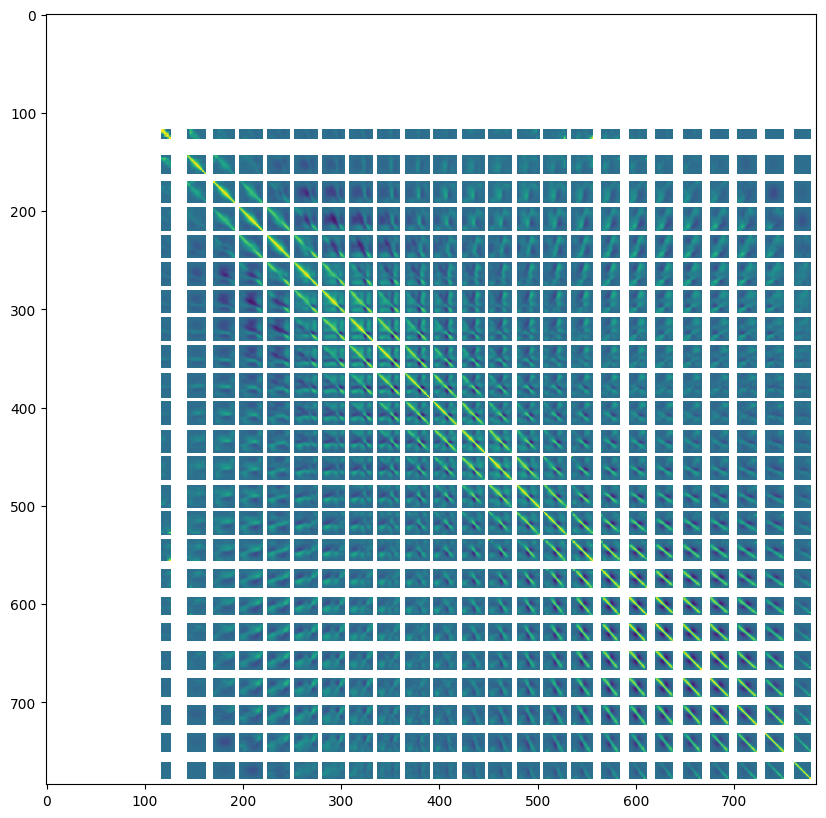

In [100]:
plt.figure(figsize=(10,10))
plt.imshow(S7)

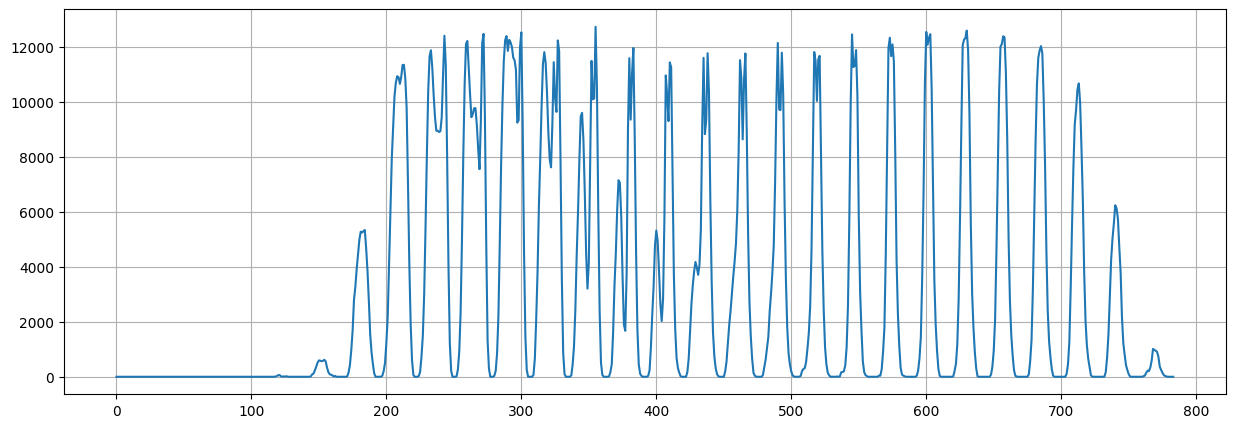

In [101]:
v = np.diag(C7)
plt.figure(figsize=(15,5))
plt.plot(v,)
plt.grid(True)

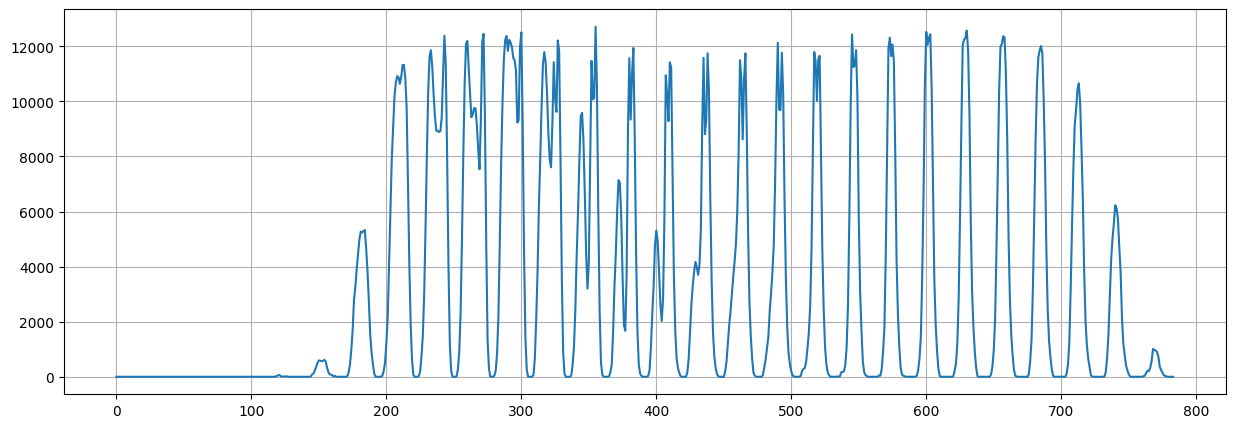

In [102]:
v = np.var(X[:,y==7],axis=1)
plt.figure(figsize=(15,5))
plt.plot(v,)
plt.grid(True)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

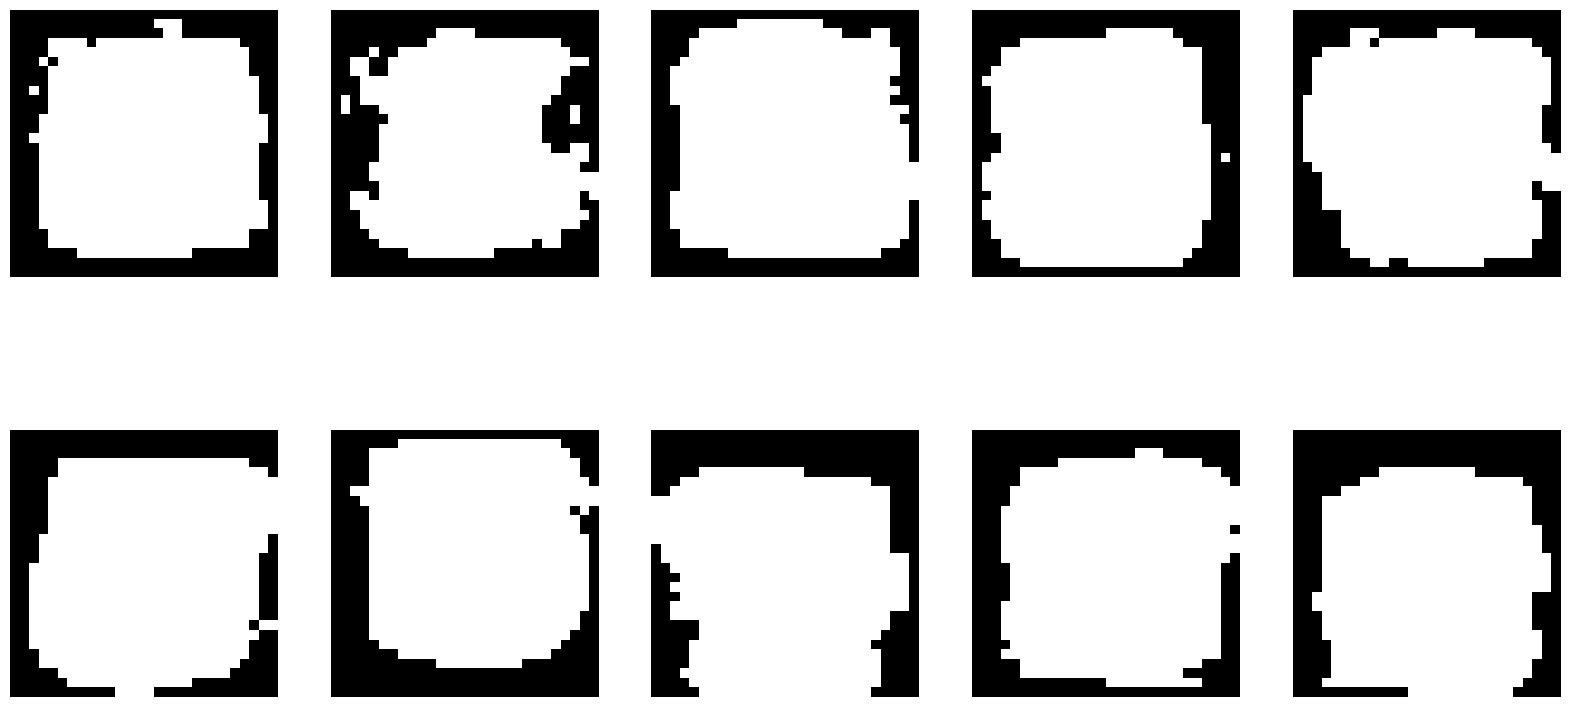

In [103]:
# z7 = (v==0)*1
# plt.imshow(1-z7.reshape((28,28)),cmap='gray')

z0 = (np.diag(C0)!=0).reshape((28,28))
z1 = (np.diag(C1)!=0).reshape((28,28))
z2 = (np.diag(C2)!=0).reshape((28,28))
z3 = (np.diag(C3)!=0).reshape((28,28))
z4 = (np.diag(C4)!=0).reshape((28,28))
z5 = (np.diag(C5)!=0).reshape((28,28))
z6 = (np.diag(C6)!=0).reshape((28,28))
z7 = (np.diag(C7)!=0).reshape((28,28))
z8 = (np.diag(C8)!=0).reshape((28,28))
z9 = (np.diag(C9)!=0).reshape((28,28))

plt.figure(figsize=(20,10))
plt.subplot(251)
plt.imshow(z0, cmap='gray')
plt.axis('off')
plt.subplot(252)
plt.imshow(z1, cmap='gray')
plt.axis('off')
plt.subplot(253)
plt.imshow(z2, cmap='gray')
plt.axis('off')
plt.subplot(254)
plt.imshow(z3, cmap='gray')
plt.axis('off')
plt.subplot(255)
plt.imshow(z4, cmap='gray')
plt.axis('off')
plt.subplot(256)
plt.imshow(z5, cmap='gray')
plt.axis('off')
plt.subplot(257)
plt.imshow(z6, cmap='gray')
plt.axis('off')
plt.subplot(258)
plt.imshow(z7, cmap='gray')
plt.axis('off')
plt.subplot(259)
plt.imshow(z8, cmap='gray')
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(z9, cmap='gray')
plt.axis('off')

In [104]:
sc = pp.StandardScaler().fit(X.T)
X2 = sc.transform(X.T).T

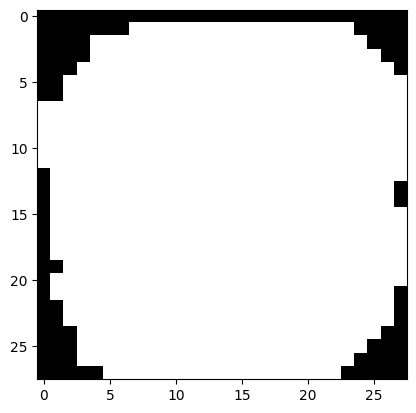

In [105]:
v = np.var(X2, axis=1)
plt.imshow(v.reshape(28,28), cmap='gray')

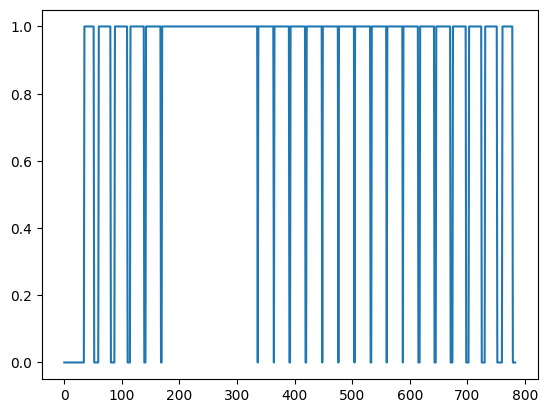

In [106]:
plt.plot(v)


### Análise em Componentes Principais (PCA)

In [107]:
Cx = np.cov(X)

In [108]:
import scipy.linalg as la
u, W = la.eig(Cx)

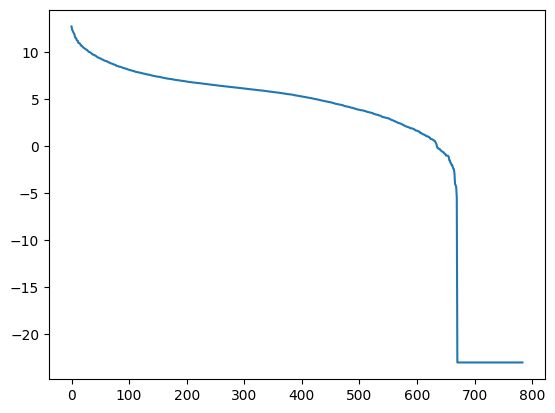

In [116]:
idx = np.argsort(-u)
u = u[idx]
W[:,idx]
plt.plot(np.log(u+1e-10))

In [110]:
u = u.real

In [111]:
u[:50]

array([330558.51704739, 238434.37874637, 207202.87800607, 181957.99452673,
       163052.59910849, 145744.77031844, 110779.66975381,  97394.84286729,
        94612.65326775,  78118.82806291,  72546.00188094,  71476.88628556,
        57583.09543118,  56457.07205009,  53972.03862309,  52227.55432371,
        44561.42324553,  43847.8165821 ,  40407.99547434,  39750.49095025,
        36141.28188955,  34783.92335868,  33031.99009787,  31638.37435035,
        30379.34884375,  29230.87438768,  27335.93245994,  26877.75838241,
        25471.1846494 ,  23652.53919237,  22534.55399269,  21838.96426956,
        20979.74206497,  20662.48957833,  19469.9551524 ,  18479.75314892,
        17852.09796496,  16567.22688665,  16379.44011331,  16200.46252671,
        15757.08678695,  14993.18078533,  14702.991511  ,  13950.88013124,
        13377.43918041,  12540.79331376,  12273.96325627,  12072.8857267 ,
        11481.58377422,  11277.74548142])

C:\Users\diogo\AppData\Local\Temp\ipykernel_10912\2794284938.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(u))
C:\Users\diogo\AppData\Local\Temp\ipykernel_10912\2794284938.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(u))


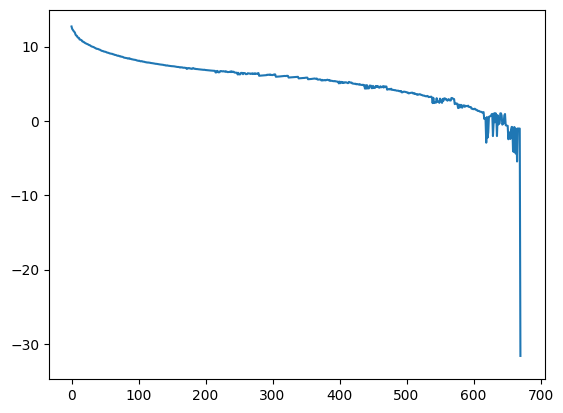

In [113]:
plt.plot(np.log(u))